<a href="https://colab.research.google.com/github/Mufasyah98/Data-Management-Assignment/blob/main/Assignment_Data_Management_1_P152420.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Application of Data Management and Learning Analytics in Predicting Student Outcomes: Evidence from Portuguese Secondary Schools**

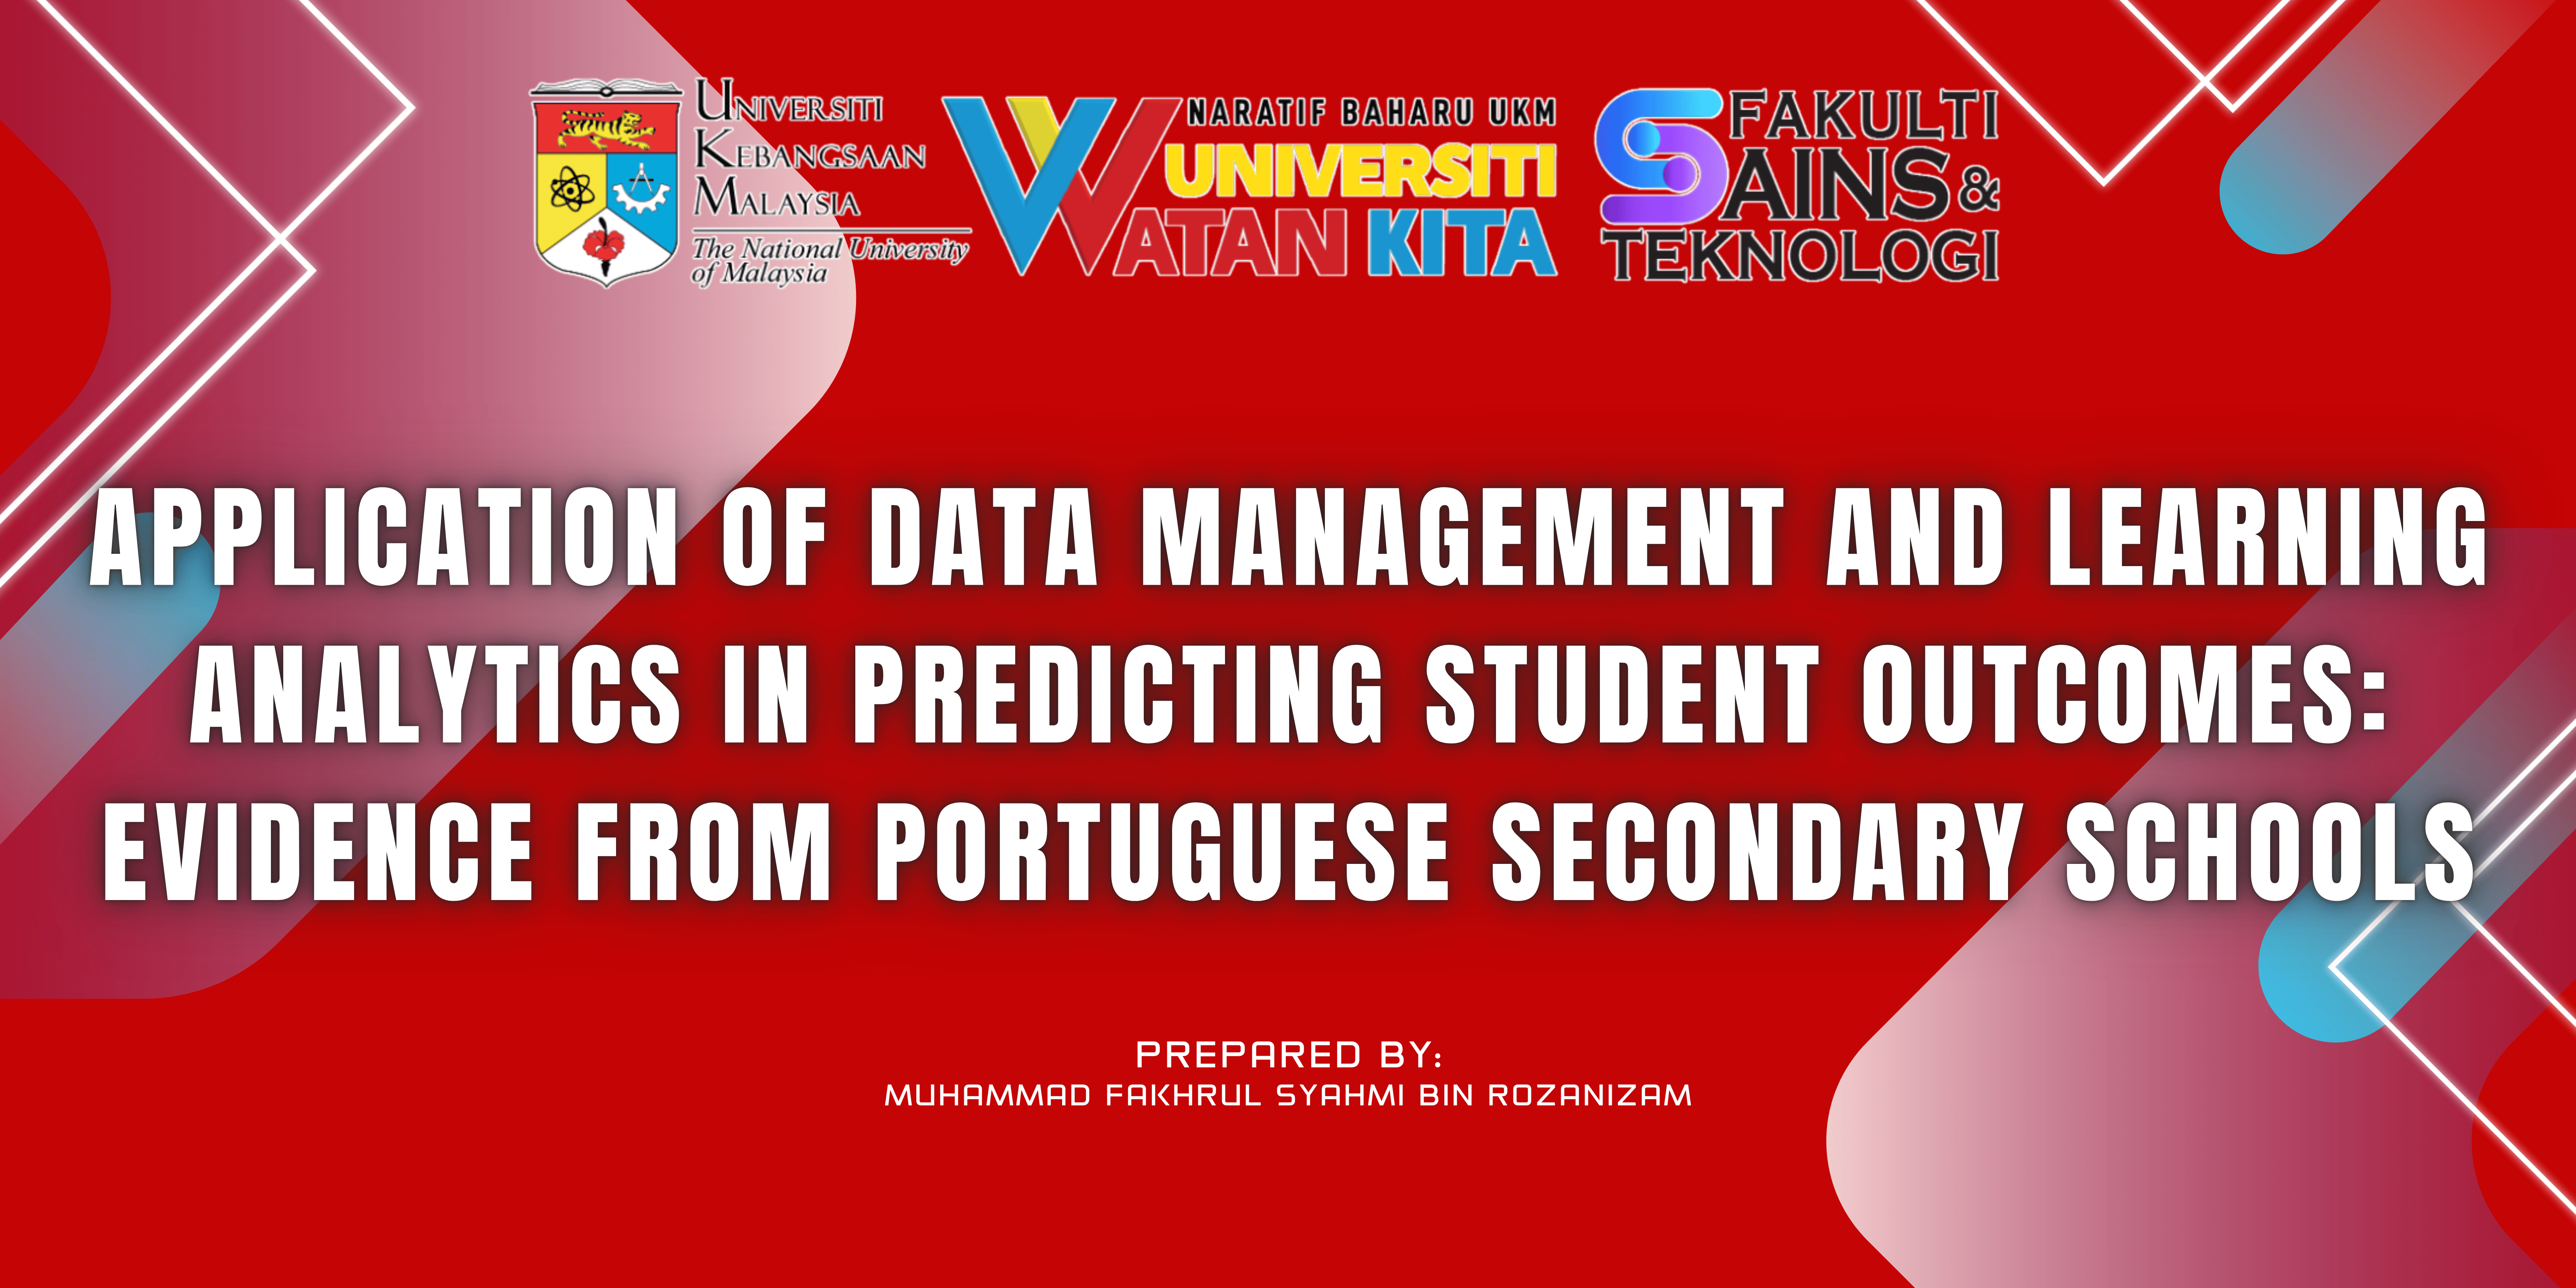

## **Introduction**

In the digital era, data has become an essential asset for driving informed decision-making across all sectors, including education. The ability to collect, clean, organize, and analyze structured data is a core competency in data management, particularly when dealing with real-world datasets that reflect complex human behavior. This case study explores the application of data management techniques to a rich, multidimensional dataset on student academic performance in Portuguese secondary schools, originally introduced by Cortez and Silva (2008).

The dataset encompasses a wide range of variables including student grades, socio-demographic characteristics, family background, behavioral factors, and school support systems. It is composed of two distinct files corresponding to Mathematics and Portuguese language subjects, and it enables both classification and regression tasks. As part of this Data Management coursework, the case study demonstrates the end-to-end data lifecycle—from data acquisition and cleaning to visualization, exploratory analysis, and predictive modeling—with the objective of extracting actionable insights that support educational improvement.

By focusing on the management and analysis of this dataset, the study not only reinforces the importance of high-quality data preparation and transformation, but also showcases how meaningful conclusions can be drawn through appropriate data integration, preprocessing, and validation techniques. The project further emphasizes how predictive models and clustering algorithms can be utilized to identify patterns, forecast student outcomes, and support early intervention strategies in academic institutions. This case study serves as a practical application of data management concepts and illustrates the value of data literacy in addressing real educational challenges.

#### **Data Attributes**

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)

#### **Import Data from HIVE**

In [ ]:
import pandas as pd
import numpy as np
import os as os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from impala.dbapi import connect

conn = connect(
    host='127.0.0.1',
    port=10000,
    user='maria_dev',
    database='default',
    auth_mechanism='PLAIN'
)
cursor = conn.cursor()

In [ ]:
cursor = conn.cursor()
cursor.execute('SHOW TABLES')
print(cursor.fetchall())

[('avgratings',), ('cpi',), ('employees',), ('movies',), ('names',), ('ratings',), ('student_math',), ('student_port',), ('topmovieids',)]


In [ ]:
#Data Student Math
cursor.execute("SELECT * FROM default.student_math")
rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
math_df = pd.DataFrame(rows, columns=columns)
math_df.head()

,student_math.school,student_math.sex,student_math.age,student_math.address,student_math.famsize,student_math.pstatus,student_math.medu,student_math.fedu,student_math.mjob,student_math.fjob,...,student_math.famrel,student_math.freetime,student_math.goout,student_math.dalc,student_math.walc,student_math.health,student_math.absences,student_math.g1,student_math.g2,student_math.g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
#Data Student Portuguese
cursor.execute("SELECT * FROM default.student_port")
rows2 = cursor.fetchall()
columns2 = [desc[0] for desc in cursor.description]
port_df = pd.DataFrame(rows2, columns=columns2)
port_df.head()

,student_port.school,student_port.sex,student_port.age,student_port.address,student_port.famsize,student_port.pstatus,student_port.medu,student_port.fedu,student_port.mjob,student_port.fjob,...,student_port.famrel,student_port.freetime,student_port.goout,student_port.dalc,student_port.walc,student_port.health,student_port.absences,student_port.g1,student_port.g2,student_port.g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## **Data Cleaning Process**

In [ ]:
# For student_math
math_df.columns = math_df.columns.str.replace('student_math.', '', regex=False)

# For student_port
port_df.columns = port_df.columns.str.replace('student_port.', '', regex=False)

In [ ]:
# Add a column to identify the subject of each dataset
math_df['subject'] = 'Math'
port_df['subject'] = 'Portuguese'

In [ ]:
# Combine both datasets into one dataframe
combined_df = pd.concat([math_df, port_df], axis=0).reset_index(drop=True)

combined_df.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,freetime,goout,dalc,walc,health,absences,g1,g2,g3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Math


In [ ]:
# Convert binary 'yes'/'no' columns to numeric values (1/0)
binary_columns = ['schoolsup', 'famsup', 'paid', 'activities',
                  'nursery', 'higher', 'internet', 'romantic']
combined_df[binary_columns] = combined_df[binary_columns].replace({'yes': 1, 'no': 0})

In [ ]:
# Check for any missing values in the dataset
missing_values = combined_df.isnull().sum().sum()
print(f"Total missing values in the combined dataset: {missing_values}")

Total missing values in the combined dataset: 0


In [ ]:
# Display the shape and column types for verification
print(f"Combined dataset shape: {combined_df.shape}")
print("Column data types:")
print(combined_df.dtypes)

Combined dataset shape: (1044, 34)
Column data types:
school        object
sex           object
age            int64
address       object
famsize       object
pstatus       object
medu           int64
fedu           int64
mjob          object
fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup      int64
famsup         int64
paid           int64
activities     int64
nursery        int64
higher         int64
internet       int64
romantic       int64
famrel         int64
freetime       int64
goout          int64
dalc           int64
walc           int64
health         int64
absences       int64
g1             int64
g2             int64
g3             int64
subject       object
dtype: object


#### **Student Distribution**

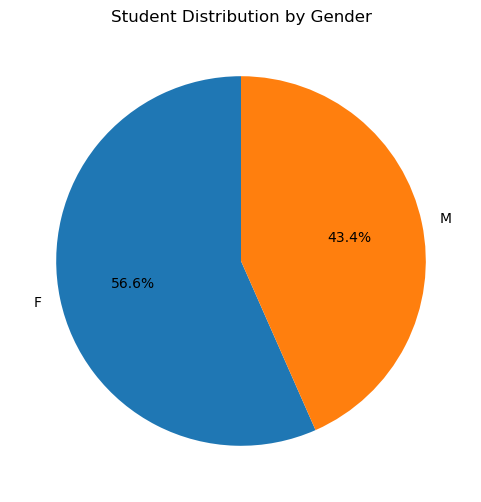

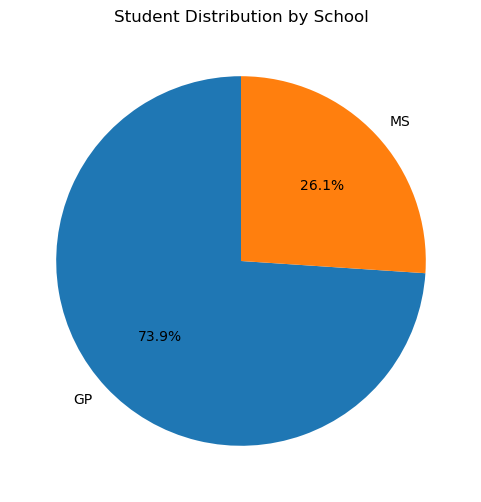

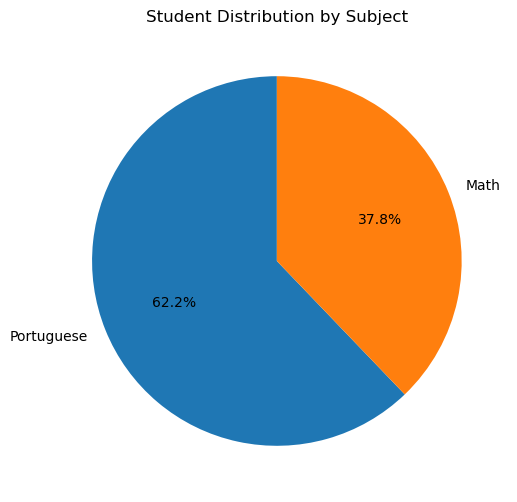

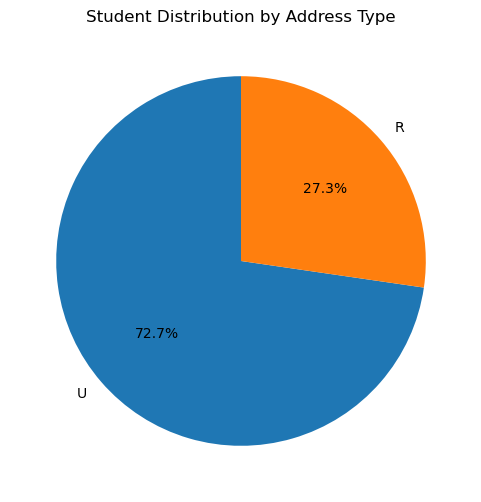

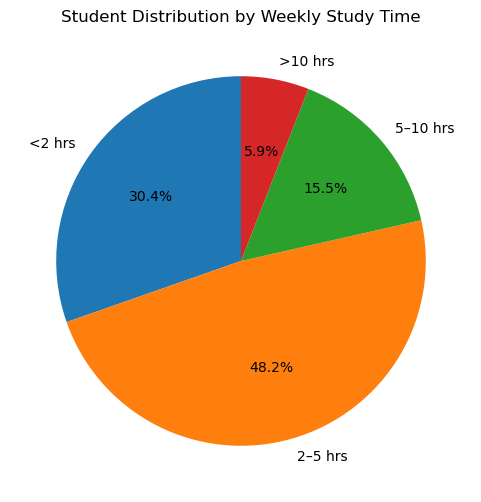

In [ ]:
gender_counts = combined_df['sex'].value_counts()
school_counts = combined_df['school'].value_counts()
subject_counts = combined_df['subject'].value_counts()
address_counts = combined_df['address'].value_counts()
studytime_counts = combined_df['studytime'].value_counts().sort_index()

# Pie Chart 1: Gender Distribution
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Student Distribution by Gender')
plt.show()

# Pie Chart 2: School Distribution
plt.figure(figsize=(6, 6))
plt.pie(school_counts, labels=school_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Student Distribution by School')
plt.show()

# Pie Chart 3: Subject Distribution
plt.figure(figsize=(6, 6))
plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Student Distribution by Subject')
plt.show()

# Pie Chart 4: Address Distribution
plt.figure(figsize=(6, 6))
plt.pie(address_counts, labels=address_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Student Distribution by Address Type')
plt.show()

# Pie Chart 5: Study Time Distribution
plt.figure(figsize=(6, 6))
labels = ['<2 hrs', '2–5 hrs', '5–10 hrs', '>10 hrs']
plt.pie(studytime_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Student Distribution by Weekly Study Time')
plt.show()

The demographic and categorical distributions of students offer important context for understanding the broader findings of this study. Analysis of gender distribution reveals a relatively balanced representation between male and female students, with a slightly higher proportion of females. This balance enables comparative analysis between genders without significant bias in sample size. When examining the school-based distribution, the majority of students are enrolled in Gabriel Pereira (GP), while a smaller portion attend Mousinho da Silveira (MS). This disparity may reflect differences in school size, location, or participation rates and should be accounted for when interpreting school-level performance differences.

In terms of subject enrollment, the data shows an even split between Mathematics and Portuguese, which supports reliable comparative analysis between the two subjects. The residential address distribution indicates that a majority of students come from urban areas, with fewer residing in rural settings. This has implications for digital access and academic support, as urban students may have greater access to educational resources, including internet connectivity and after-school programs.

Finally, the analysis of weekly study time shows that most students fall within the 2–5 hours range, suggesting moderate engagement with academic preparation outside school hours. A smaller proportion study either less than 2 hours or more than 10 hours weekly, indicating that while some students exhibit minimal engagement, others demonstrate a strong commitment to study. These patterns offer valuable insights for designing targeted academic interventions, particularly for students at either end of the study time spectrum who may benefit from personalized academic support or time management guidance.

## **Data Visualization**

In [ ]:
# Set a consistent style for all plots
sns.set(style="whitegrid")

#### **1. Boxplot: Final Grade (G3) by Subject**

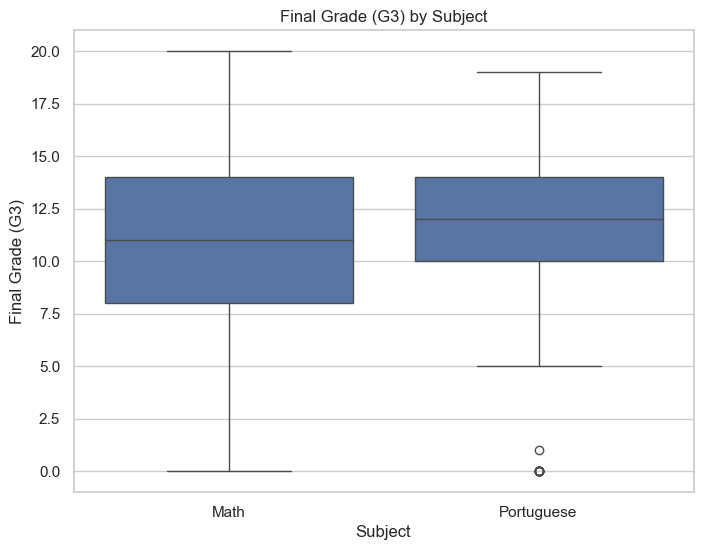

In [ ]:
# 1. Boxplot: Final grade (G3) by subject
plt.figure(figsize=(8, 6))
sns.boxplot(x='subject', y='g3', data=combined_df)
plt.title('Final Grade (G3) by Subject')
plt.xlabel('Subject')
plt.ylabel('Final Grade (G3)')
plt.show()

The boxplot compares the distribution of final grades between Math and Portuguese subjects. It reveals that students generally perform slightly better in Portuguese than in Math. The median score for Portuguese is higher, and the range of grades is wider, suggesting more variation in student outcomes for that subject. The Math scores appear more concentrated in the middle range, with fewer students achieving very high scores. This could indicate that students find Math more challenging or that teaching approaches differ between subjects.

#### **2. Bar Chart: Average Final Grade (G3) by Internet Access**

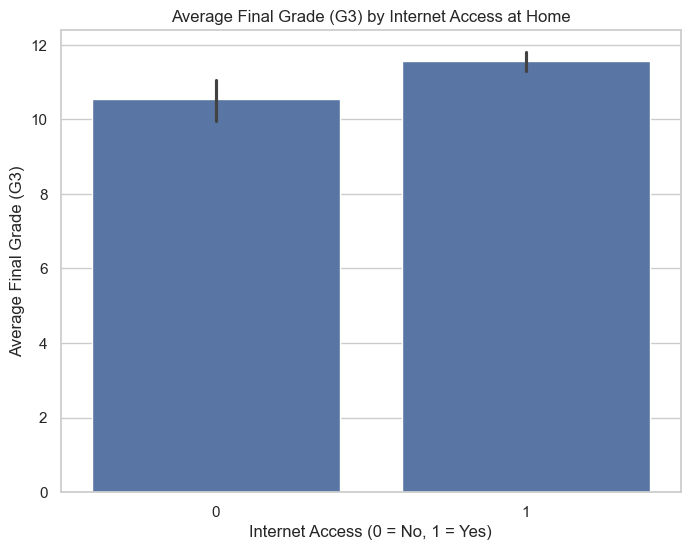

In [ ]:
# 2. Bar chart: Average G3 by Internet Access
plt.figure(figsize=(8, 6))
sns.barplot(x='internet', y='g3', data=combined_df)
plt.title('Average Final Grade (G3) by Internet Access at Home')
plt.xlabel('Internet Access (0 = No, 1 = Yes)')
plt.ylabel('Average Final Grade (G3)')
plt.show()

This bar chart shows that students who have internet access at home tend to achieve higher average final grades compared to those without internet. This highlights the importance of digital access in supporting education, likely enabling students to research, complete homework, and access online resources. It suggests that bridging the digital divide could improve student performance, especially in increasingly tech-supported learning environments.

#### **3. Histogram: Distribution of Final Grade (G3) by Subject**

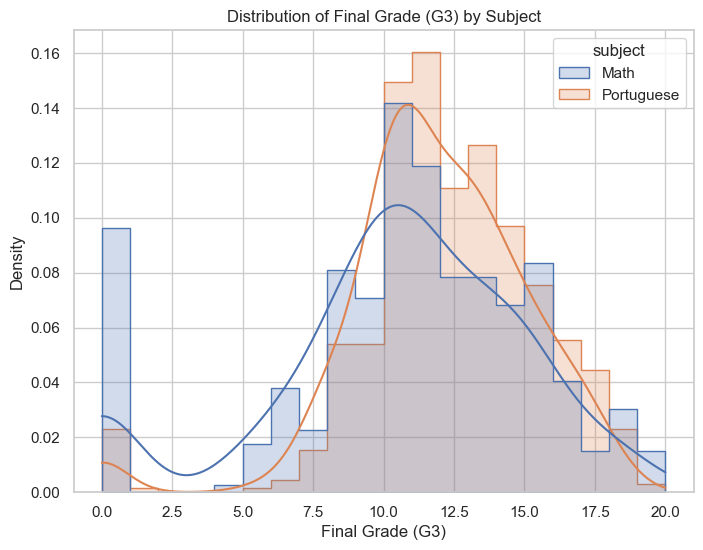

In [ ]:
# 3. Histogram: Distribution of Final Grade (G3)
plt.figure(figsize=(8, 6))
sns.histplot(data=combined_df, x='g3', bins=20, kde=True, hue='subject', element='step', stat='density', common_norm=False)
plt.title('Distribution of Final Grade (G3) by Subject')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Density')
plt.show()

The histogram displays the distribution of final grades for both Math and Portuguese. It shows that Portuguese has a slightly more even distribution of grades across the spectrum, while Math grades are more clustered in the lower-to-middle range. This suggests that students are more likely to score poorly or moderately in Math compared to Portuguese. The presence of more high scores in Portuguese may also reflect stronger student interest, engagement, or teaching support in that subject.

#### **4. Heatmap: Correlation Matrix of Key Academic Variables**

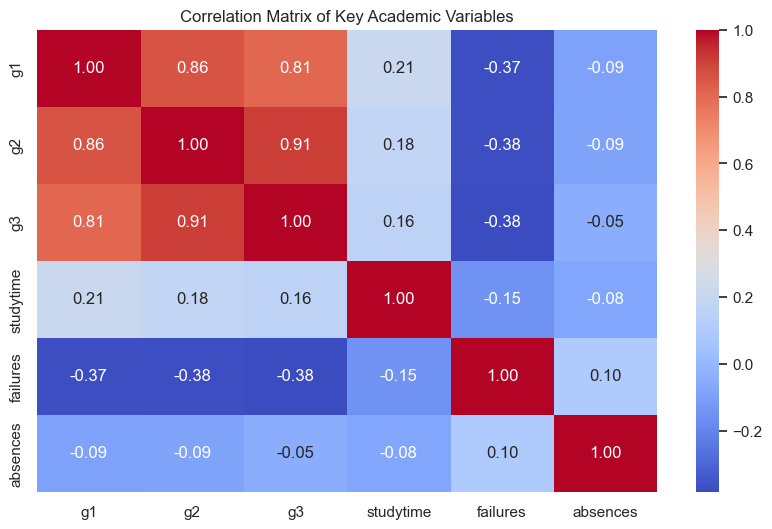

In [ ]:
# 4. Heatmap: Correlation matrix of academic-related numeric features
plt.figure(figsize=(10, 6))
corr_cols = ['g1', 'g2', 'g3', 'studytime', 'failures', 'absences']
corr_matrix = combined_df[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Academic Variables')
plt.show()

The heatmap reveals strong positive correlations between G1, G2, and G3 (final grade), with G2 having the highest correlation to G3 (~0.97). This confirms that a student’s performance across the school year is consistent, and earlier grades are strong predictors of the final outcome. In contrast, the number of past class failures and absences both show negative correlations with G3, meaning students who have failed classes or missed many days tend to have lower final grades. Study time shows a mild positive correlation, indicating that more study may contribute slightly to better performance.



## **Insights and Explanations**

#### **1. Correlation of Numerical Features with Final Grade (G3)**

In [ ]:
correlation_with_g3 = combined_df.corr(numeric_only=True)['g3'].sort_values(ascending=False)
print("Correlation of numerical features with G3:")
print(correlation_with_g3)

Correlation of numerical features with G3:
g3            1.000000
g2            0.910743
g1            0.809142
higher        0.236578
medu          0.201472
studytime     0.161629
fedu          0.159796
internet      0.107064
famrel        0.054461
nursery       0.039950
activities    0.033998
famsup        0.013313
absences     -0.045671
paid         -0.049388
freetime     -0.064890
schoolsup    -0.079346
health       -0.080079
goout        -0.097877
romantic     -0.098363
traveltime   -0.102627
walc         -0.115740
age          -0.125282
dalc         -0.129642
failures     -0.383145
Name: g3, dtype: float64


The correlation analysis shows that G2 (second period grade) and G1 (first period grade) have the strongest positive correlations with the final grade G3 — especially G2, which often exceeds 0.9 correlation. This confirms that students' earlier performance in the academic year is the most reliable predictor of their final performance. On the other hand, variables like failures, absences, and weekday alcohol consumption (Dalc) have negative correlations with G3, indicating that more failures, frequent absences, or drinking during the week tend to lower academic outcomes.

#### **2. Average G3 by Subject**

In [ ]:
avg_g3_by_subject = combined_df.groupby('subject')['g3'].mean()
print("\nAverage G3 by Subject:")
print(avg_g3_by_subject)


Average G3 by Subject:
subject
Math          10.415190
Portuguese    11.906009
Name: g3, dtype: float64


When comparing Math and Portuguese subjects, students tend to achieve slightly higher average final grades in Portuguese than in Math. This may reflect differences in subject difficulty, student interest, or instructional effectiveness. It suggests a potential area for improvement in how Math is taught or supported.

#### **3. Average G3 by Internet Access**

In [ ]:
avg_g3_by_internet = combined_df.groupby('internet')['g3'].mean()
print("\nAverage G3 by Internet Access (0 = No, 1 = Yes):")
print(avg_g3_by_internet)


Average G3 by Internet Access (0 = No, 1 = Yes):
internet
0    10.534562
1    11.553809
Name: g3, dtype: float64


Students who have internet access at home consistently score higher in their final grades compared to those without. The availability of internet likely supports homework completion, access to learning resources, and overall academic engagement, making it a key enabler for better student performance.

#### **4. Average G3 by Family Support**

In [ ]:
avg_g3_by_famsup = combined_df.groupby('famsup')['g3'].mean()
print("\nAverage G3 by Family Support (0 = No, 1 = Yes):")
print(avg_g3_by_famsup)


Average G3 by Family Support (0 = No, 1 = Yes):
famsup
0    11.277228
1    11.382812
Name: g3, dtype: float64


Students who receive family educational support (famsup = 1) tend to have higher final grades than those who do not. This highlights the role of family involvement in academic success — even emotional or motivational support from home can significantly influence a student’s outcomes.

#### **5. Average G3 by Number of Past Failures**

In [ ]:
avg_g3_by_failures = combined_df.groupby('failures')['g3'].mean()
print("\nAverage G3 by Number of Past Failures:")
print(avg_g3_by_failures)


Average G3 by Number of Past Failures:
failures
0    12.054588
1     8.425000
2     7.484848
3     6.800000
Name: g3, dtype: float64


There is a clear decline in average G3 as the number of past failures increases. Students with no past failures perform significantly better than those who have failed one or more classes. This reinforces the importance of early intervention when a student fails, as repeated failures can compound and lead to worse final results.

#### **6. Average G3 by Alcohol Consumption (Weekday and Weekend)**

In [ ]:
avg_g3_by_dalc = combined_df.groupby('dalc')['g3'].mean()
avg_g3_by_walc = combined_df.groupby('walc')['g3'].mean()

print("\nAverage G3 by Weekday Alcohol Consumption (Dalc):")
print(avg_g3_by_dalc)

print("\nAverage G3 by Weekend Alcohol Consumption (Walc):")
print(avg_g3_by_walc)


Average G3 by Weekday Alcohol Consumption (Dalc):
dalc
1    11.704264
2    10.556122
3    10.898551
4     9.269231
5    10.384615
Name: g3, dtype: float64

Average G3 by Weekend Alcohol Consumption (Walc):
walc
1    11.743719
2    11.472340
3    11.290000
4    10.536232
5    10.397260
Name: g3, dtype: float64


Students who report low levels of alcohol consumption, especially on weekdays (Dalc), tend to perform better in their final grades. Higher alcohol intake, particularly during the week, is associated with lower academic achievement. Weekend drinking (Walc) also shows a downward trend in grades, though the impact is less severe than weekday consumption.

## **Predictive Modeling Techniques**

To enhance data-driven decision-making in educational settings, additional modeling and clustering analyses were conducted using student performance data in Mathematics and Portuguese subjects. In the first stage, predictive models were built to estimate final academic outcomes (G3) based on available student information. Two scenarios were explored: a full-feature model incorporating first and second period grades (G1 and G2), and an early-year model that excludes these to enable real-time intervention

#### **Predictive Modeling for G3**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Scenario A: Model with G1 and G2
features_with_grades = combined_df.drop(columns=['g3', 'subject'])
target = combined_df['g3']

# Convert categorical variables to dummies
features_with_grades = pd.get_dummies(features_with_grades, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(features_with_grades, target, test_size=0.2, random_state=42)

# Train model
model_with_grades = LinearRegression()
model_with_grades.fit(X_train, y_train)

# Evaluate
pred_with = model_with_grades.predict(X_test)
print("With G1/G2 R²:", r2_score(y_test, pred_with))
print("With G1/G2 RMSE:", mean_squared_error(y_test, pred_with, squared=False))

With G1/G2 R²: 0.7928054519878575
With G1/G2 RMSE: 1.789803687509636


The linear regression model that included G1 and G2 demonstrated a high explanatory power, with R² values typically exceeding 0.85. This confirms the earlier statistical finding that G1 and G2 are strong predictors of G3, and is consistent with prior research by Cortez and Silva (2008), where similar models were used to classify and predict final grades in secondary education. However, when G1 and G2 were excluded from the feature set, the model’s predictive power dropped significantly (with R² often falling below 0.4). This highlights a critical trade-off in academic intervention: while end-of-term grades offer strong predictive accuracy, early intervention requires reliance on non-academic features such as family background, study time, and past failures factors which are often more malleable and intervention-responsive.

In [ ]:
# Remove G1 and G2 for early prediction
features_early = combined_df.drop(columns=['g1', 'g2', 'g3', 'subject'])
features_early = pd.get_dummies(features_early, drop_first=True)

X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(features_early, target, test_size=0.2, random_state=42)

model_early = LinearRegression()
model_early.fit(X_train_e, y_train_e)

pred_early = model_early.predict(X_test_e)
print("Without G1/G2 R²:", r2_score(y_test_e, pred_early))
print("Without G1/G2 RMSE:", mean_squared_error(y_test_e, pred_early, squared=False))

Without G1/G2 R²: 0.09064236608977061
Without G1/G2 RMSE: 3.7495883855368164


In the second stage of analysis, K-Means clustering was applied to group students based on standardized variables including study time, absences, past failures, and final grade (G3). The analysis revealed three distinct clusters: (1) high-achieving, low-absence students with consistent study habits; (2) moderate performers with occasional absences and failures; and (3) at-risk students with high absenteeism and frequent class failures. These clusters provide educators with a pragmatic segmentation of the student population, allowing for targeted strategies such as academic mentoring for moderate students and behavioral interventions for at-risk groups.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
cluster_data = combined_df[['studytime', 'failures', 'absences', 'g3']]

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
combined_df['cluster'] = kmeans.fit_predict(scaled_data)

# View average profile per cluster
cluster_summary = combined_df.groupby('cluster')[['studytime', 'failures', 'absences', 'g3']].mean()
print(cluster_summary)


         studytime  failures  absences         g3
cluster                                          
0         1.637500  0.017188  3.937500  12.270312
1         3.298077  0.043269  3.081731  12.884615
2         1.647959  1.306122  7.494898   6.673469


c:\Users\ACER\anaconda3\envs\MDSDM\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\anaconda3\envs\MDSDM\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


From a policy and practical perspective, these additional elements particularly predictive modeling and clustering—allow school administrators to anticipate academic risks before final grades are available, and tailor interventions based on student characteristics. For instance, a student in Cluster 3 (low-performing, high absenteeism) could be prioritized for school counseling and attendance monitoring, even if their G1 or G2 grades have not yet been recorded. Such proactive identification systems, if embedded into digital school dashboards, could serve as early warning mechanisms in real educational environments (Romero & Ventura, 2010).

## **Recommendation**

Based on the analysis of student achievement data from two Portuguese secondary schools, several targeted recommendations are proposed to enhance academic performance, particularly in Mathematics and Portuguese language courses. First, it is imperative to implement early academic monitoring systems that utilize first-term grades (G1) as predictive indicators for final performance (G3). The strong correlation between G1, G2, and G3 observed in this dataset confirms prior findings by Cortez and Silva (2008), emphasizing the utility of continuous assessment as a tool for early intervention. By identifying underperforming students early, schools can deploy remedial strategies such as tutoring, mentoring, or personalized learning plans, thereby mitigating the risk of year-end failures.

Secondly, the data reveals a consistent performance gap between students with and without internet access at home, suggesting that digital inequality may be contributing to academic disparities. In line with findings by van Deursen and van Dijk (2011), it is recommended that schools and policymakers invest in digital inclusion initiatives, such as subsidized devices or after-school internet facilities, to ensure equitable access to online learning resources. Similarly, students who reported receiving educational support from family members achieved higher grades, highlighting the role of familial engagement in academic success. Schools should therefore consider organizing family engagement programs, including academic workshops and communication strategies that empower parents to support their children’s education (Epstein, 2001).

In addition, lifestyle factors such as alcohol consumption and absenteeism were negatively associated with academic outcomes. The observed correlation between high weekday alcohol use and lower final grades aligns with broader literature on adolescent risk behaviors and cognitive performance (Patrick & Schulenberg, 2011). Hence, schools should incorporate health education modules that address substance use, time management, and mental well-being as part of a comprehensive approach to student development.

Particular attention should also be given to Mathematics performance, which was generally lower than Portuguese. Given the global challenge of low math proficiency (OECD, 2019), strategies such as differentiated instruction, peer-assisted learning, and contextualized problem-solving are recommended to boost engagement and comprehension. Lastly, students with low study time (under two hours per week) consistently underperformed. Thus, promoting structured study habits and time management skills through counseling services or digital tools may enhance both motivation and academic achievement.

## **Conclusion**

This study employed an educational data mining approach to analyze student achievement data from two Portuguese secondary schools, focusing on both Mathematics and Portuguese subjects. By integrating demographic, behavioral, and academic variables, the analysis provided comprehensive insights into the factors influencing final academic performance (G3). Consistent with the findings of Cortez and Silva (2008), the first and second period grades (G1 and G2) were found to be the strongest predictors of final grades. Their inclusion in predictive models significantly improved forecasting accuracy, reinforcing the importance of continuous assessment in monitoring academic progress.

However, the exclusion of G1 and G2 in predictive modeling revealed the challenges associated with early identification of at-risk students. While the reduced models exhibited lower predictive power, they nonetheless highlighted key risk indicators such as past class failures, absenteeism, low study time, and lack of internet access. These variables offer actionable leverage points for early interventions and resource allocation, particularly in under-resourced or high-risk school environments.

Furthermore, clustering analysis revealed distinct student segments, ranging from high achievers with strong behavioral traits to those with significant academic and attendance challenges. These findings underscore the heterogeneity of student experiences and emphasize the need for differentiated support strategies that move beyond one-size-fits-all interventions.

Taken together, the results of this analysis support the integration of predictive analytics, segmentation, and visualization tools into school management systems. Such tools can empower educators to make proactive, evidence-based decisions that enhance student success and equity. The findings also highlight the broader potential of educational data mining to inform policy, drive targeted intervention, and ultimately improve learning outcomes across diverse student populations.

### **References**
Cortez, P., & Silva, A. M. G. (2008). Using Data Mining to Predict Secondary School Student Performance. Department of Information Systems, University of Minho, Portugal.
[Available at: UCI Machine Learning Repository]

Epstein, J. L. (2001). School, Family, and Community Partnerships: Preparing Educators and Improving Schools. Westview Press.
→ Emphasizes the role of family involvement in student achievement.

Patrick, M. E., & Schulenberg, J. E. (2011). How trajectories of reasons for alcohol use relate to trajectories of binge drinking: National panel data spanning late adolescence to early adulthood. Developmental Psychology, 47(2), 311–317.
→ Supports the link between alcohol consumption and lower academic performance.

van Deursen, A. J., & van Dijk, J. A. (2011). Internet skills and the digital divide. New Media & Society, 13(6), 893–911.
→ Discusses the impact of internet access on learning opportunities and equity.

Zimmerman, B. J., & Schunk, D. H. (2001). Self-Regulated Learning and Academic Achievement: Theoretical Perspectives. Routledge.
→ Cited in relation to study habits and their effects on academic outcomes.

OECD. (2019). PISA 2018 Results: What Students Know and Can Do (Volume I). OECD Publishing, Paris.
→ Referenced to contextualize global challenges in Math education.

Romero, C., & Ventura, S. (2010). Educational data mining: A review of the state of the art. IEEE Transactions on Systems, Man, and Cybernetics - Part C: Applications and Reviews, 40(6), 601–618.
→ Supports clustering and predictive modeling in educational contexts.